# Bike

In [48]:
import pandas as pd

In [49]:
a=pd.read_csv('/home/govardhan/Downloads/bike_share.csv')
a.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [222]:
print(a.shape)
a.info()

(10886, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [51]:
a.isnull().any()

season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

EDA:

In [223]:
a.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [224]:
import seaborn as sns


In [55]:
categorical_var=a.drop(['temp','atemp','humidity','windspeed', 'casual', 'registered'],axis=1)
continuous_var=a.drop(['season', 'holiday', 'workingday', 'weather'],axis=1)

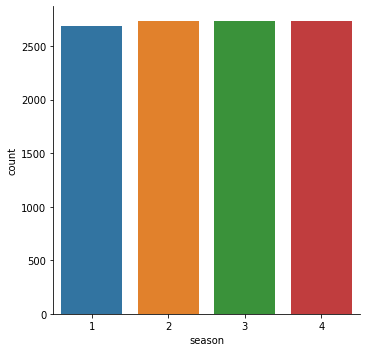

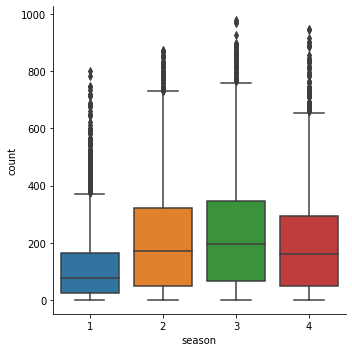

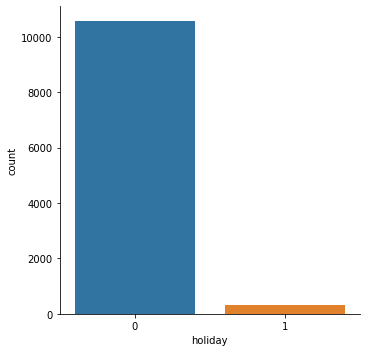

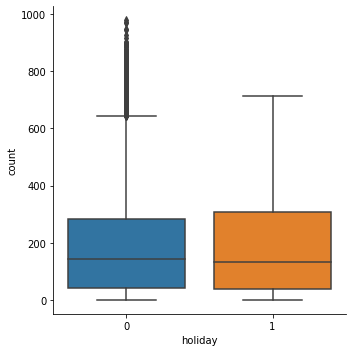

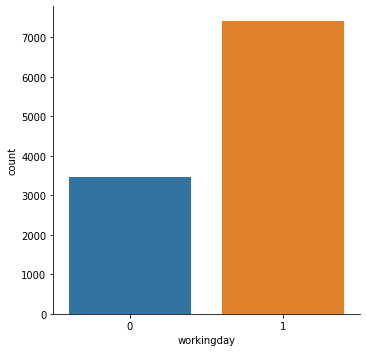

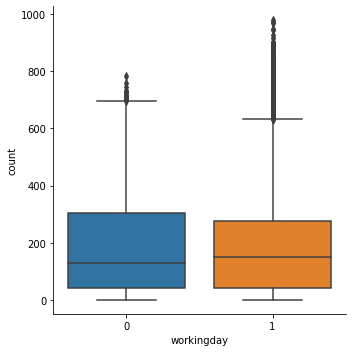

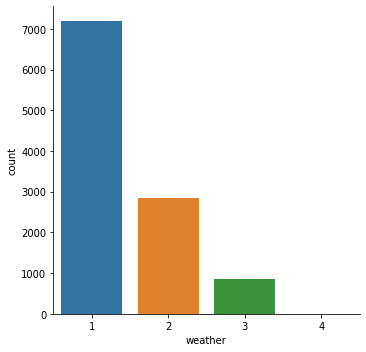

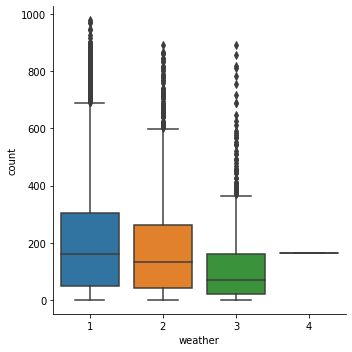

In [56]:
for i in categorical_var:
    if i != 'count':
        sns.catplot(x=i,data=categorical_var,kind='count')
        sns.catplot(y='count',x=i,data=categorical_var,kind='box')

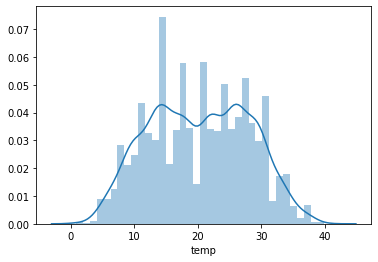

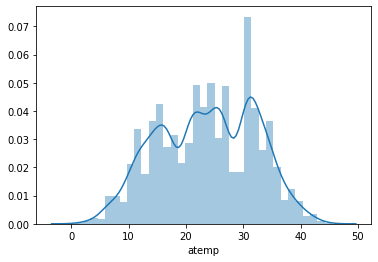

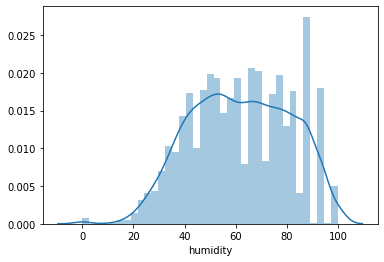

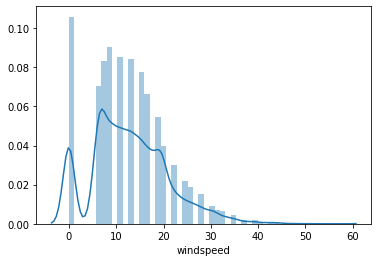

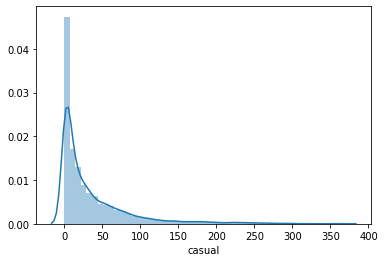

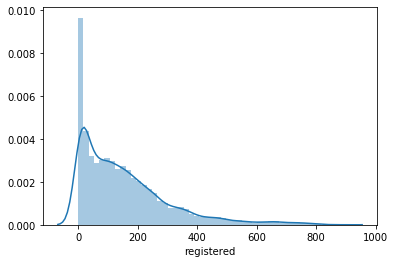

In [57]:
import matplotlib.pyplot as plt
for i in continuous_var:
    if i != 'count':
        #sns.scatterplot(x=i,y='count',data=continuous_var)
        sns.distplot(continuous_var[i])
        plt.show()

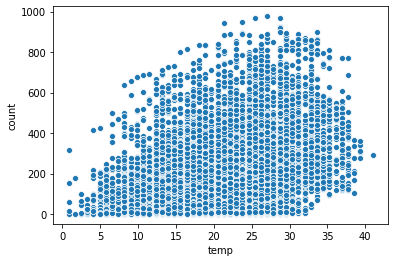

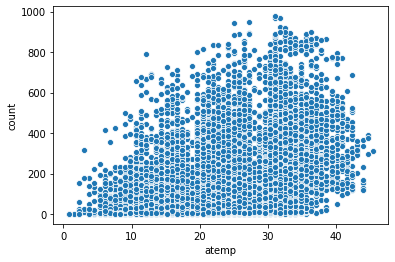

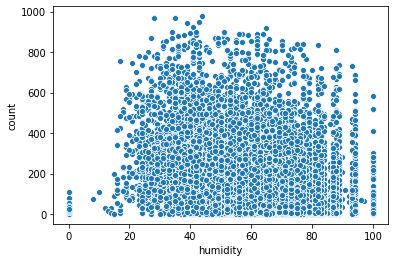

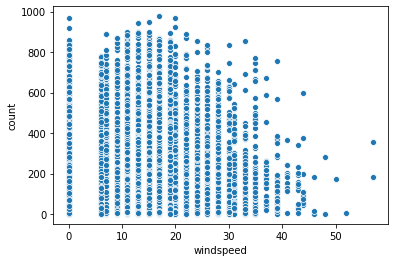

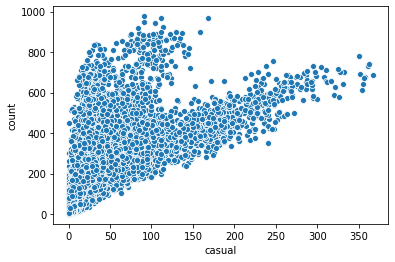

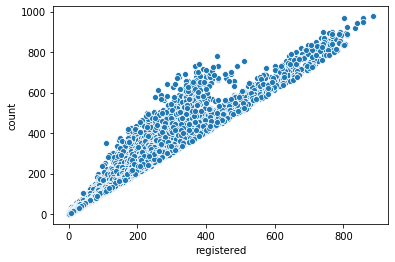

In [59]:
for i in continuous_var:
    if i != 'count':
        sns.scatterplot(x=i,y='count',data=continuous_var)
        #sns.distplot(continuous_var[i])
        plt.show()

Linear regression:

In [65]:
#corelation:
a_cor=a.corr()
a_cor

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


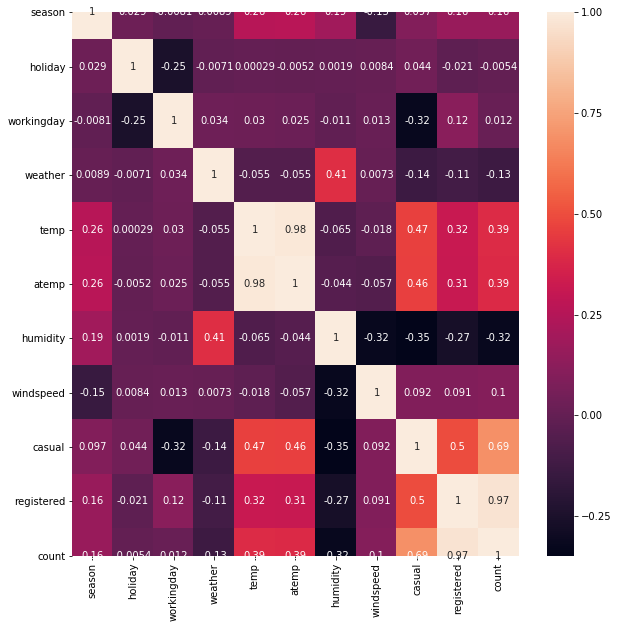

In [228]:
plt.figure(figsize=(10,10))
sns.heatmap(a_cor,annot=True)


In [62]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [91]:
x=a.drop(['count'],axis=1)
y=a['count']

In [92]:
x_s=StandardScaler()


In [93]:
x1=x_s.fit_transform(x)

In [96]:
x1=pd.DataFrame(x1)
x1.columns=x.columns


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=12)

In [179]:
lm=cross_val_score(LinearRegression(),x_train,y_train,cv=5)
rr=cross_val_score(Ridge(),x_train,y_train,cv=5)
lr=cross_val_score(Lasso(),x_train,y_train,cv=5)

In [180]:
print("cross validation score:")
print("linear regression :",lm,lm.mean(),lm.std())
print("ridge regression :",rr,rr.mean(),rr.std())
print("lasso regression :",lr,lr.mean(),lr.std())

cross validation score:
linear regression : [1. 1. 1. 1. 1.] 1.0 0.0
ridge regression : [0.99999998 0.99999998 0.99999998 0.99999998 0.99999998] 0.9999999818302137 1.2765451375348367e-09
lasso regression : [0.99996022 0.99996059 0.99995918 0.99995902 0.99995573] 0.999958949879659 1.7152331178733423e-06


In [112]:
#Linear regression:
lm=LinearRegression()

In [113]:
model=lm.fit(x_train,y_train)
pred_test=model.predict(x_test)
print("coeff -",model.coef_)
print("intercept -",model.intercept_)


coeff - [ 0.00000000e+00  6.90112597e-15 -8.55443990e-14  7.11755055e-14
 -8.61446814e-14  1.96536289e-13 -3.89311806e-14 -2.79881734e-14
  4.99581818e+01  1.51032096e+02]
intercept - 191.57413191254824


In [116]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred_test,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred_test,y_true=y_test))

TEST DATA:
accuracy -  100.0 %
error -  1.8774709895495623e-26


Text(0, 0.5, 'actual')

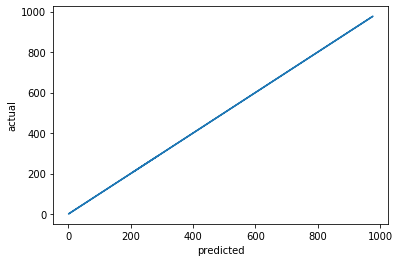

In [118]:
plt.plot(pred_test,y_test)
plt.xlabel("predicted")
plt.ylabel("actual")

In [121]:
print("the predicted values are : ")
pred_test=pd.DataFrame(pred_test)
print(pred_test)

the predicted values are : 
          0
0     286.0
1     254.0
2     318.0
3       1.0
4     138.0
...     ...
2173  107.0
2174  417.0
2175  304.0
2176  229.0
2177  207.0

[2178 rows x 1 columns]


In [122]:
#lasso regression:

In [210]:
#grid search:
params={'alpha':[10,1,0.1,0.01,0.001,0.00001]}
lr=Lasso()
grid_cv=GridSearchCV(estimator=lr,param_grid=params,scoring="neg_mean_squared_error",cv=5,)
grid_cv.fit(x_train,y_train)
print(grid_cv.best_params_)
pd.DataFrame(grid_cv.cv_results_)

{'alpha': 0.01}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004727,0.000933,0.001497,0.000076,10,{'alpha': 10},-130.951385,-125.585668,-125.965240,-142.633729,-144.572923,-133.939570,8.135492,6
1,0.004760,0.000982,0.001581,0.000242,1,{'alpha': 1},-1.308443,-1.254862,-1.257955,-1.425156,-1.444729,-1.338207,0.081457,5
2,0.004171,0.000162,0.001424,0.000182,0.1,{'alpha': 0.1},-0.012763,-0.012209,-0.012457,-0.013958,-0.013962,-0.013069,0.000747,4
3,0.005313,0.000234,0.001343,0.000019,0.01,{'alpha': 0.01},-0.000134,-0.000129,-0.000131,-0.000144,-0.000147,-0.000137,0.000007,1
4,0.005495,0.000342,0.001335,0.000016,0.001,{'alpha': 0.001},-0.011340,-0.003345,-0.004215,-0.005580,-0.004448,-0.005786,0.002867,2
5,0.005433,0.000258,0.001355,0.000037,1e-05,{'alpha': 1e-05},-0.015583,-0.004588,-0.005668,-0.007105,-0.005989,-0.007787,0.003980,3


In [211]:
lr=Lasso(alpha=0.01)

In [212]:
model=lr.fit(x_train,y_train)

In [213]:
pred_test=model.predict(x_test)

In [214]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred_test,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred_test,y_true=y_test))

TEST DATA:
accuracy -  99.99999959345134 %
error -  0.0001367555981293561


Text(0, 0.5, 'actual')

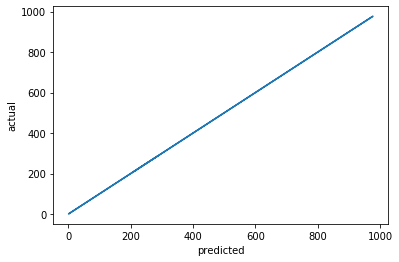

In [215]:
plt.plot(pred_test,y_test)
plt.xlabel("predicted")
plt.ylabel("actual")

In [132]:
#Ridge regression:

In [198]:
#grid search for ridge regression:
grid_values={'alpha':[20,10,1,0.1,0.01,0.001,0.0001,0.00001]}
rr=Ridge()
grid_cv=GridSearchCV(estimator=rr,param_grid=grid_values,scoring='neg_mean_squared_error',cv=5)
grid_cv.fit(x_train,y_train)
y_pred1=grid_cv.predict(x_test)
#print(r2_score(y_pred1,y_test))
print(grid_cv.best_params_)
pd.DataFrame(grid_cv.cv_results_)

{'alpha': 1e-05}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003639,0.000196,0.001399,0.000074,20,{'alpha': 20},-2.496992e-01,-2.312742e-01,-2.235651e-01,-2.668769e-01,-2.042357e-01,-2.351301e-01,2.155273e-02,8
1,0.003946,0.000270,0.001596,0.000095,10,{'alpha': 10},-6.270882e-02,-5.807060e-02,-5.613244e-02,-6.701240e-02,-5.126629e-02,-5.903809e-02,5.418601e-03,7
2,0.004251,0.000574,0.001658,0.000254,1,{'alpha': 1},-6.297180e-04,-5.829944e-04,-5.635112e-04,-6.727803e-04,-5.145482e-04,-5.927102e-04,5.446704e-05,6
3,0.003558,0.000023,0.001422,0.000011,0.1,{'alpha': 0.1},-6.299856e-06,-5.832244e-06,-5.637308e-06,-6.730469e-06,-5.147378e-06,-5.929449e-06,5.449561e-07,5
4,0.003650,0.000084,0.001450,0.000037,0.01,{'alpha': 0.01},-6.300124e-08,-5.832474e-08,-5.637527e-08,-6.730735e-08,-5.147568e-08,-5.929683e-08,5.449847e-09,4
5,0.003733,0.000046,0.001494,0.000026,0.001,{'alpha': 0.001},-6.300151e-10,-5.832497e-10,-5.637549e-10,-6.730762e-10,-5.147587e-10,-5.929707e-10,5.449876e-11,3
6,0.003706,0.000021,0.001497,0.000035,0.0001,{'alpha': 0.0001},-6.300154e-12,-5.832499e-12,-5.637552e-12,-6.730765e-12,-5.147588e-12,-5.929709e-12,5.449881e-13,2
7,0.003711,0.000007,0.001493,0.000021,1e-05,{'alpha': 1e-05},-6.300151e-14,-5.832500e-14,-5.637553e-14,-6.730769e-14,-5.147590e-14,-5.929711e-14,5.449883e-15,1


In [216]:
rr=Ridge(alpha=0.00001)

In [217]:
model=rr.fit(x_train,y_train)

In [218]:
pred_test=model.predict(x_test)

In [219]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred_test,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred_test,y_true=y_test))

TEST DATA:
accuracy -  100.0 %
error -  3.8671526867141104e-14


Text(0, 0.5, 'actual')

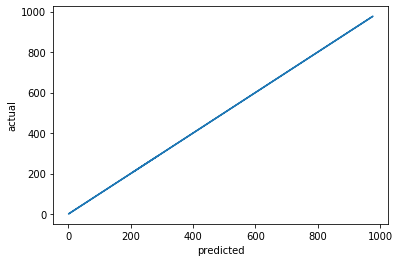

In [220]:
plt.plot(pred_test,y_test)
plt.xlabel("predicted")
plt.ylabel("actual")

In [221]:
#predicted values:
pd.DataFrame(pred_test)

,0
0,286.0
1,254.0
2,318.0
3,1.0
4,138.0
...,...
2173,107.0
2174,417.0
2175,304.0
2176,229.0
